In [ ]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

In [ ]:
import sys
import os

# Setting up a Google Colab environment for working with files stored in Google Drive

if 'google.colab' in sys.modules:
    from google.colab import drive

    # Mounting Google Drive
    drive.mount('/content/drive/', force_remount=True)


    project_path = "/content/drive/My Drive/"
    sys.path.append(project_path)
    %cd $project_path

# Current working directory
print('Current working directory:', os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive
Current working directory: /content/drive/My Drive


In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/cancer_data.csv')

In [ ]:
# Display Data
display(df)
print('\n')

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
print('\n')
df.drop("index", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Display Data After Cleaning
display(df)
print('\n')

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# Check For Null Values

print('\n')
df.isnull().sum()

patient_id                  0
age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

In [ ]:
# Print Information
print('\n')
print(df.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_id                1000 non-null   object
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   int64 
 3   air_pollution             1000 non-null   int64 
 4   alcohol_use               1000 non-null   int64 
 5   dust_allergy              1000 non-null   int64 
 6   occupational_hazards      1000 non-null   int64 
 7   genetic_risk              1000 non-null   int64 
 8   chronic_lung_disease      1000 non-null   int64 
 9   balanced_diet             1000 non-null   int64 
 10  obesity                   1000 non-null   int64 
 11  smoking                   1000 non-null   int64 
 12  passive_smoker            1000 non-null   int64 
 13  chest_pain                1000 non-null   int64 
 14  coughing_of_blood      

In [ ]:
# Replace "level" with Integer

print('\n')
print('Cancer Levels: ', df['level'].unique())

# Replacing levels with int
df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

print('\nColumns in dataframe: \n', df.columns)
print('\n')



Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['patient_id', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level'],
      dtype='object')




In [ ]:
# Round

print('\n')
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,4.5,2.1,1.0,3.0,4.0,7.0,7.0


In [ ]:
group1 = ['age', 'weight_loss', 'smoking']

group2 = ['gender']

group3 = ['air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue']

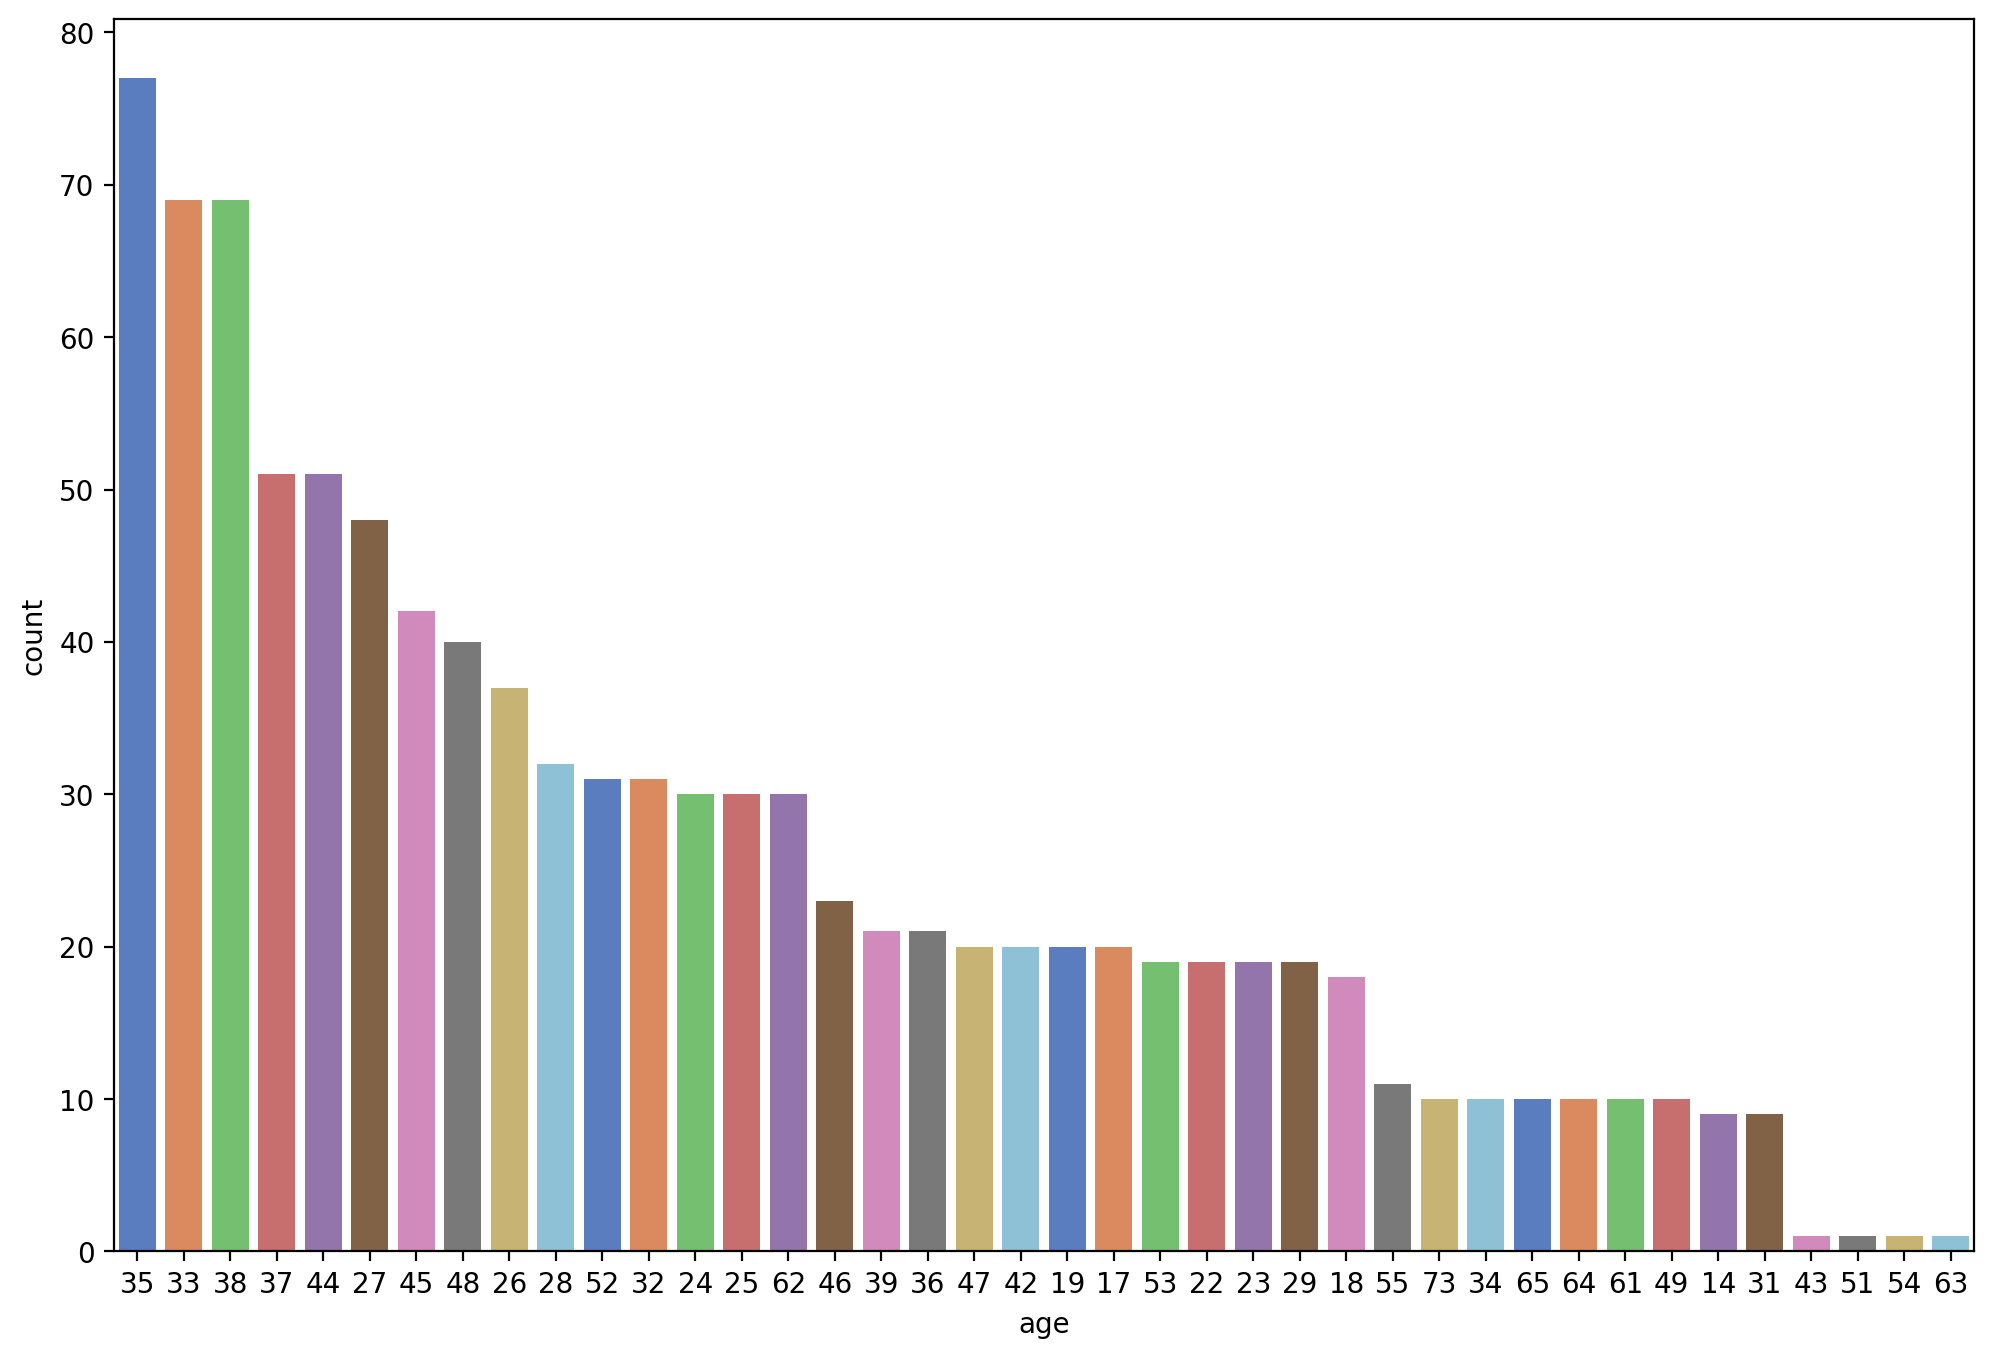

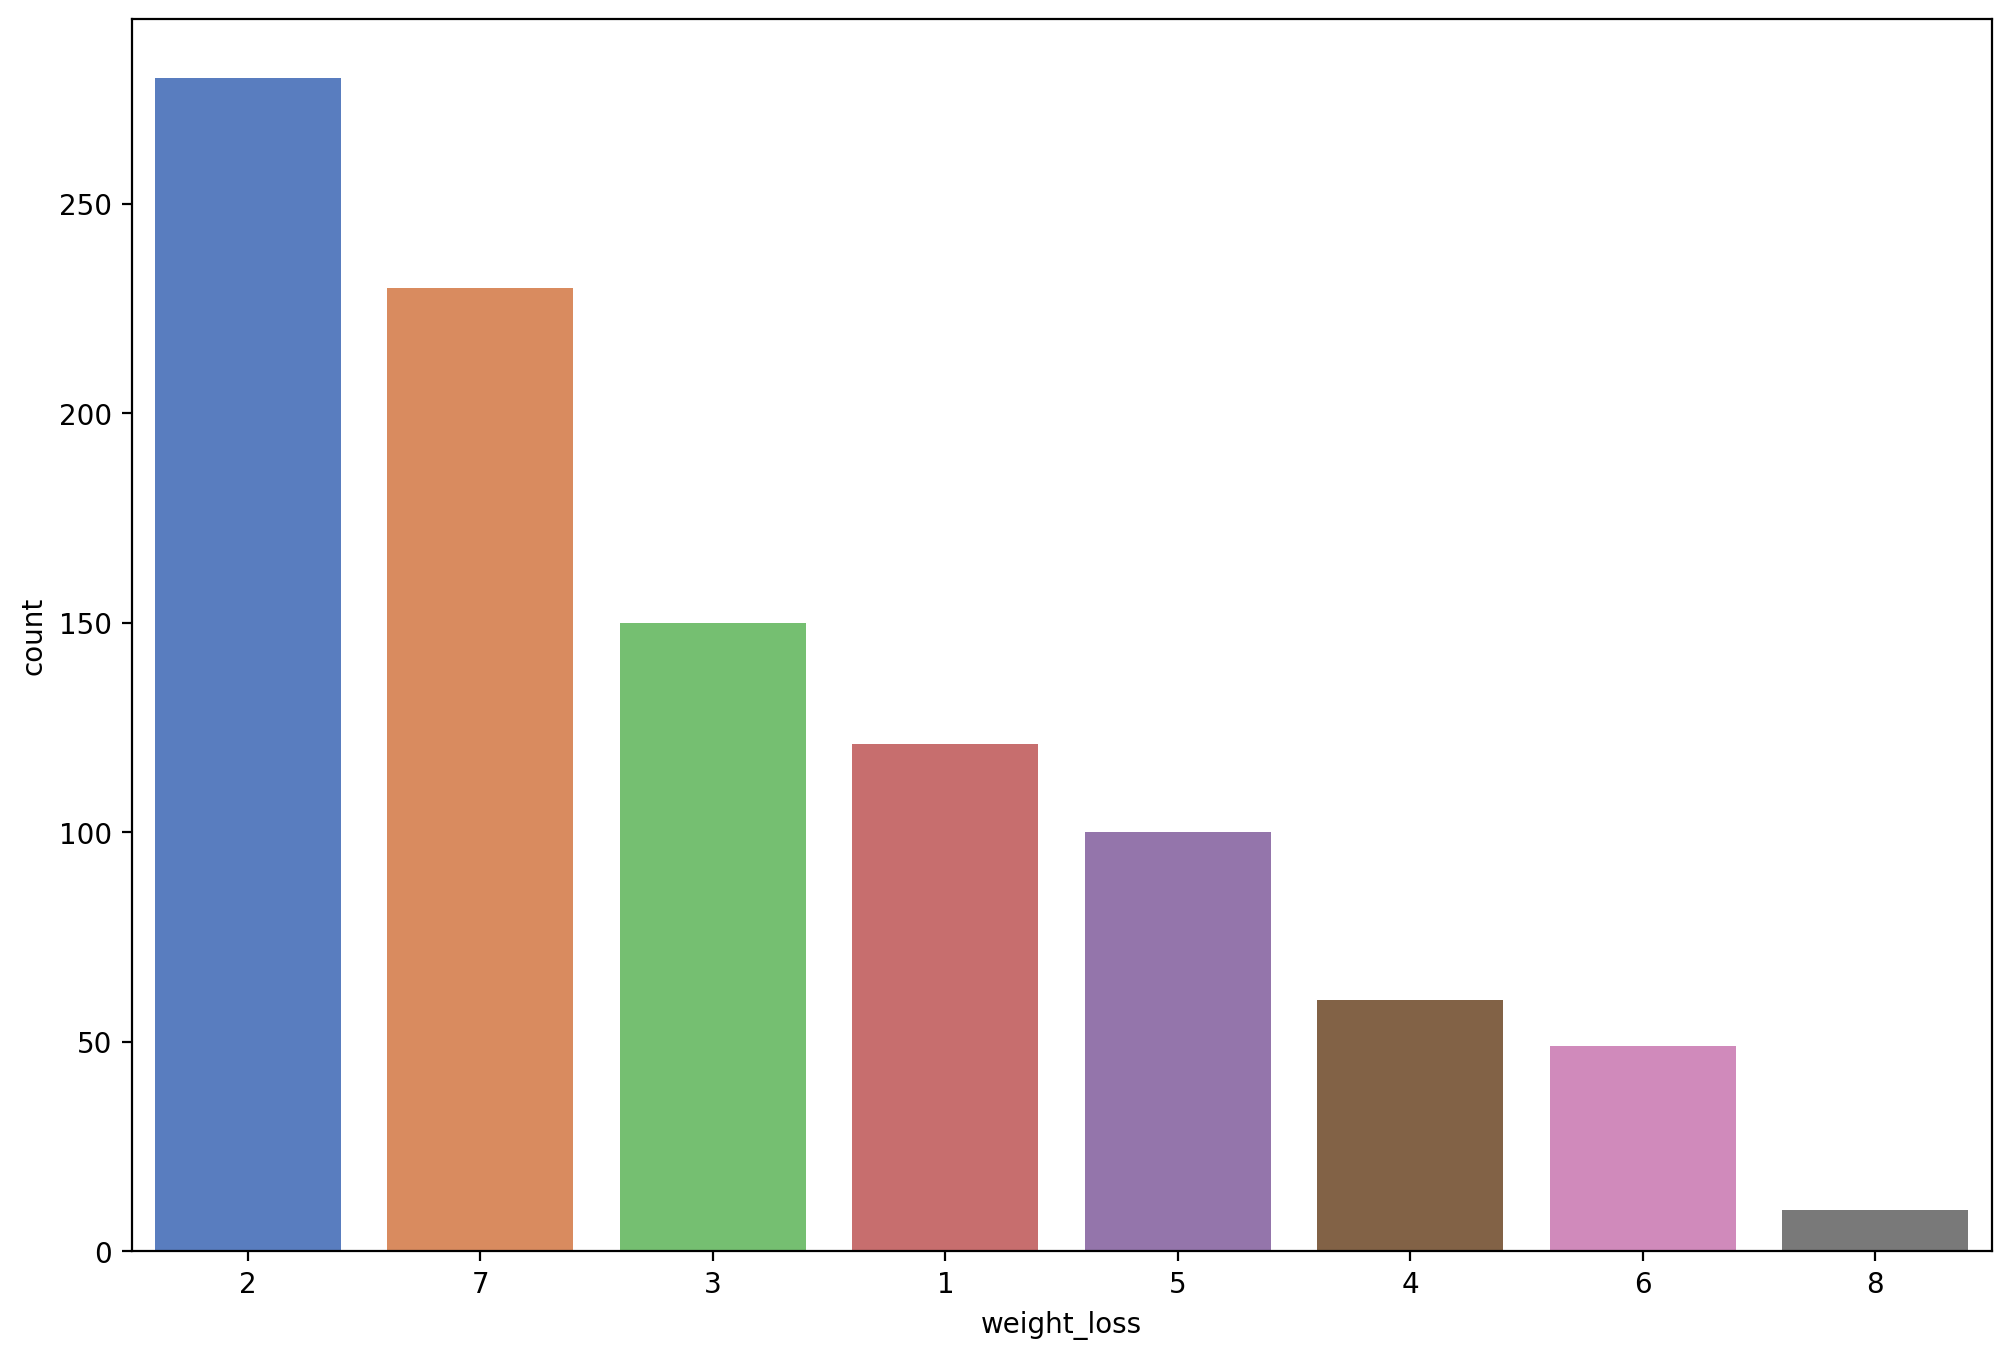

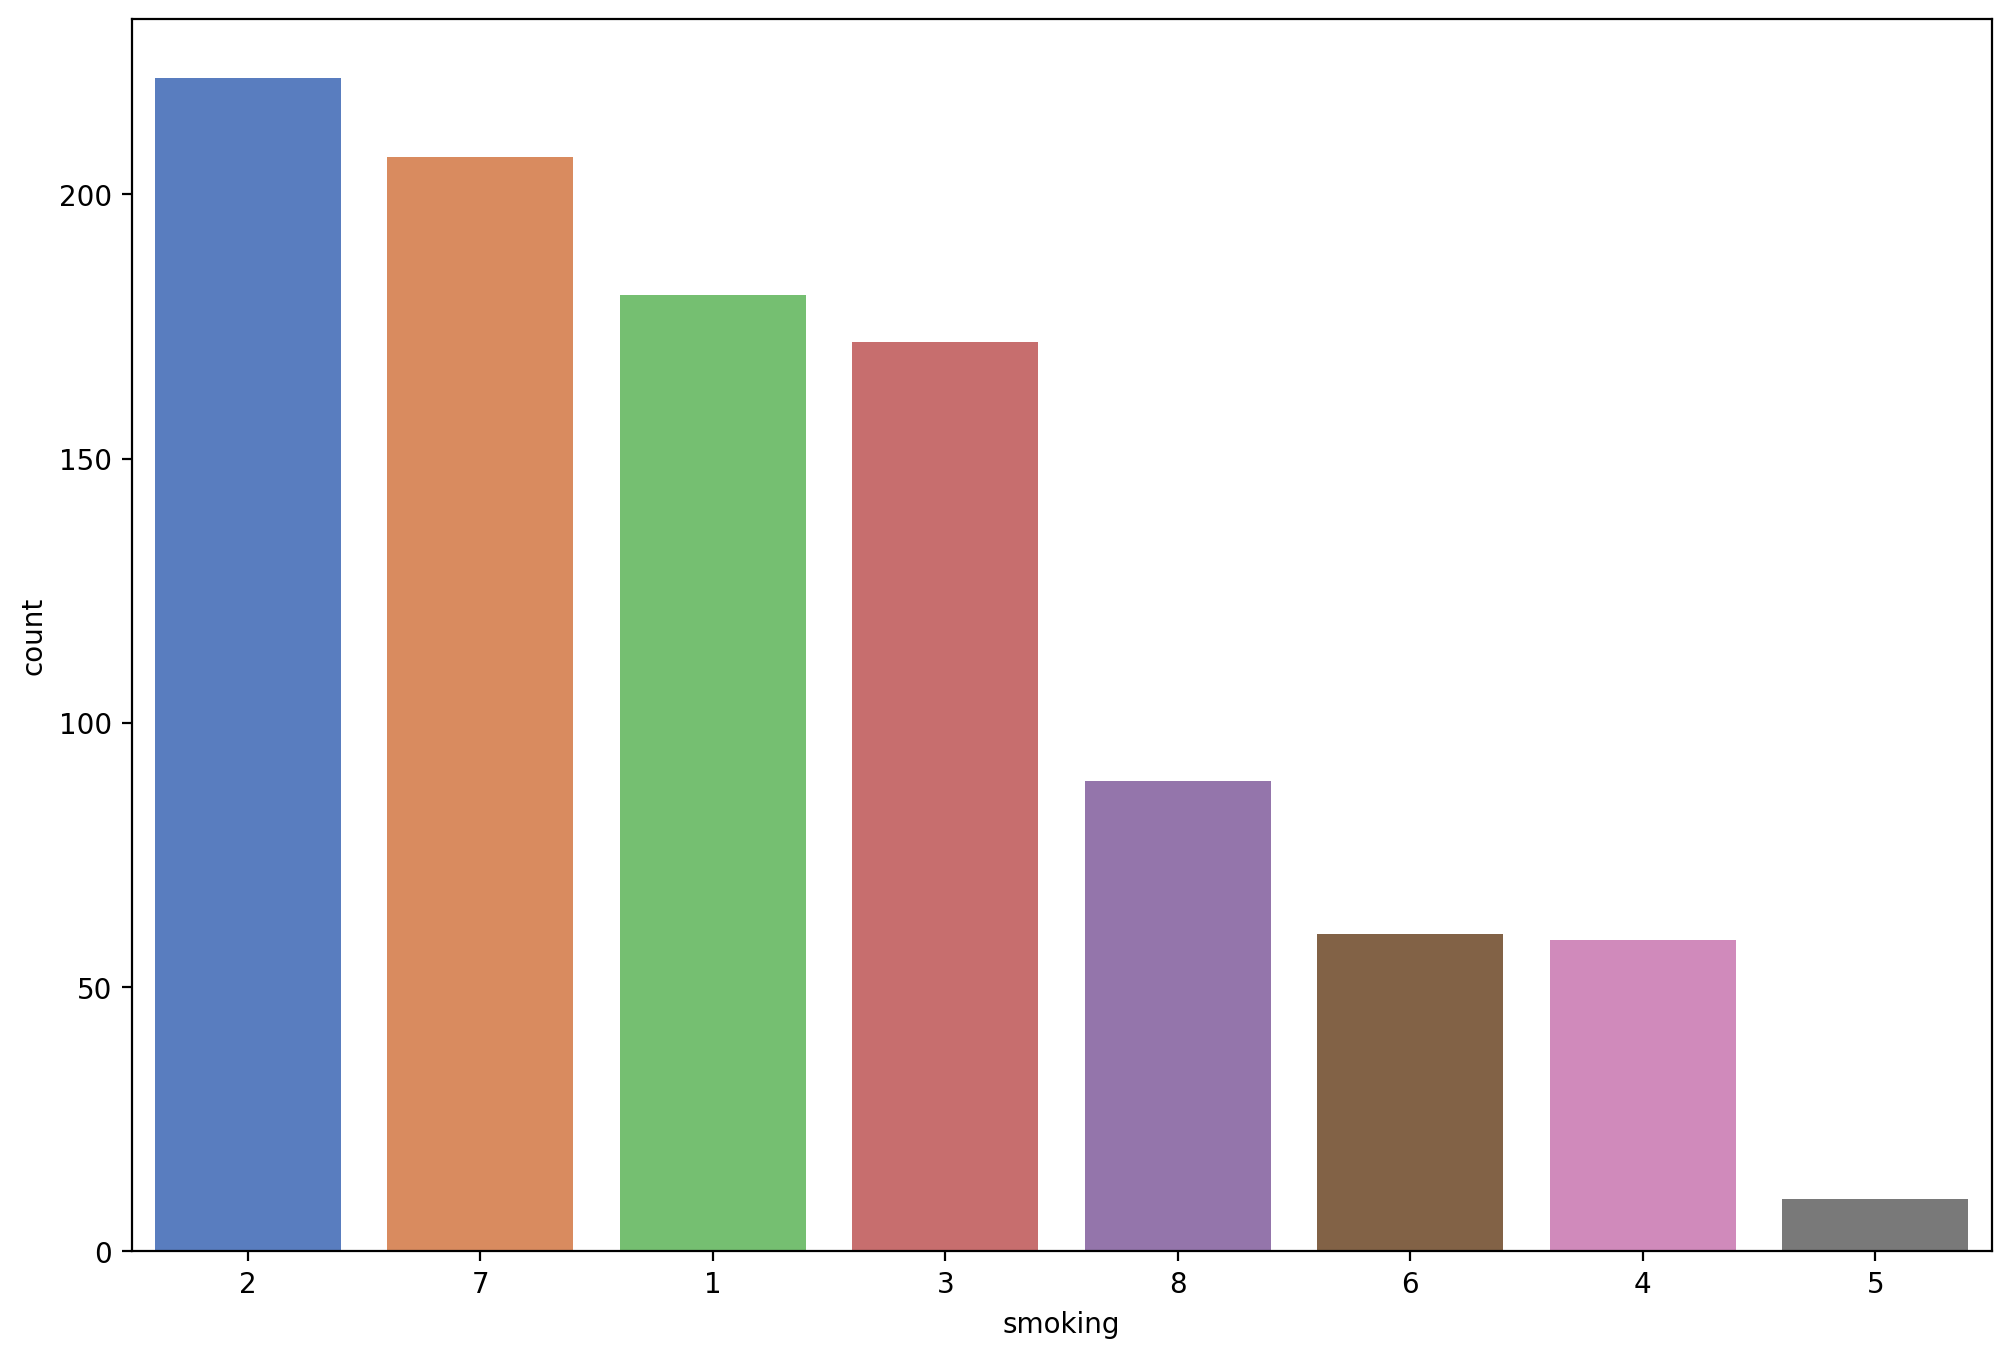

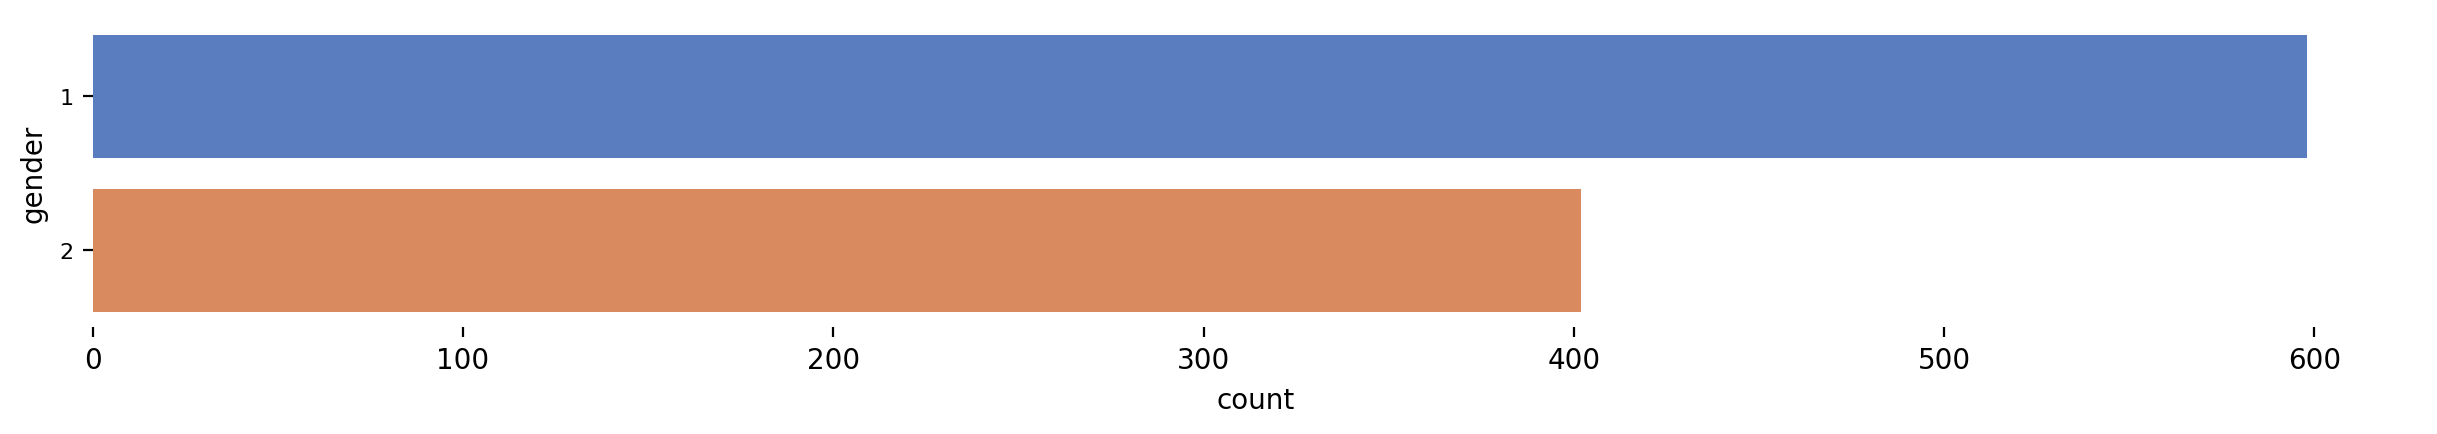

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\n')
for i in group1:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    sns.countplot(x=df[i], data=df, order=df[i].value_counts().index, palette='muted')
    plt.xlabel(i)
    plt.xticks(fontsize=10)
    plt.show()

for i in group2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='muted')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    plt.box(False)
    plt.show()

print('\n')


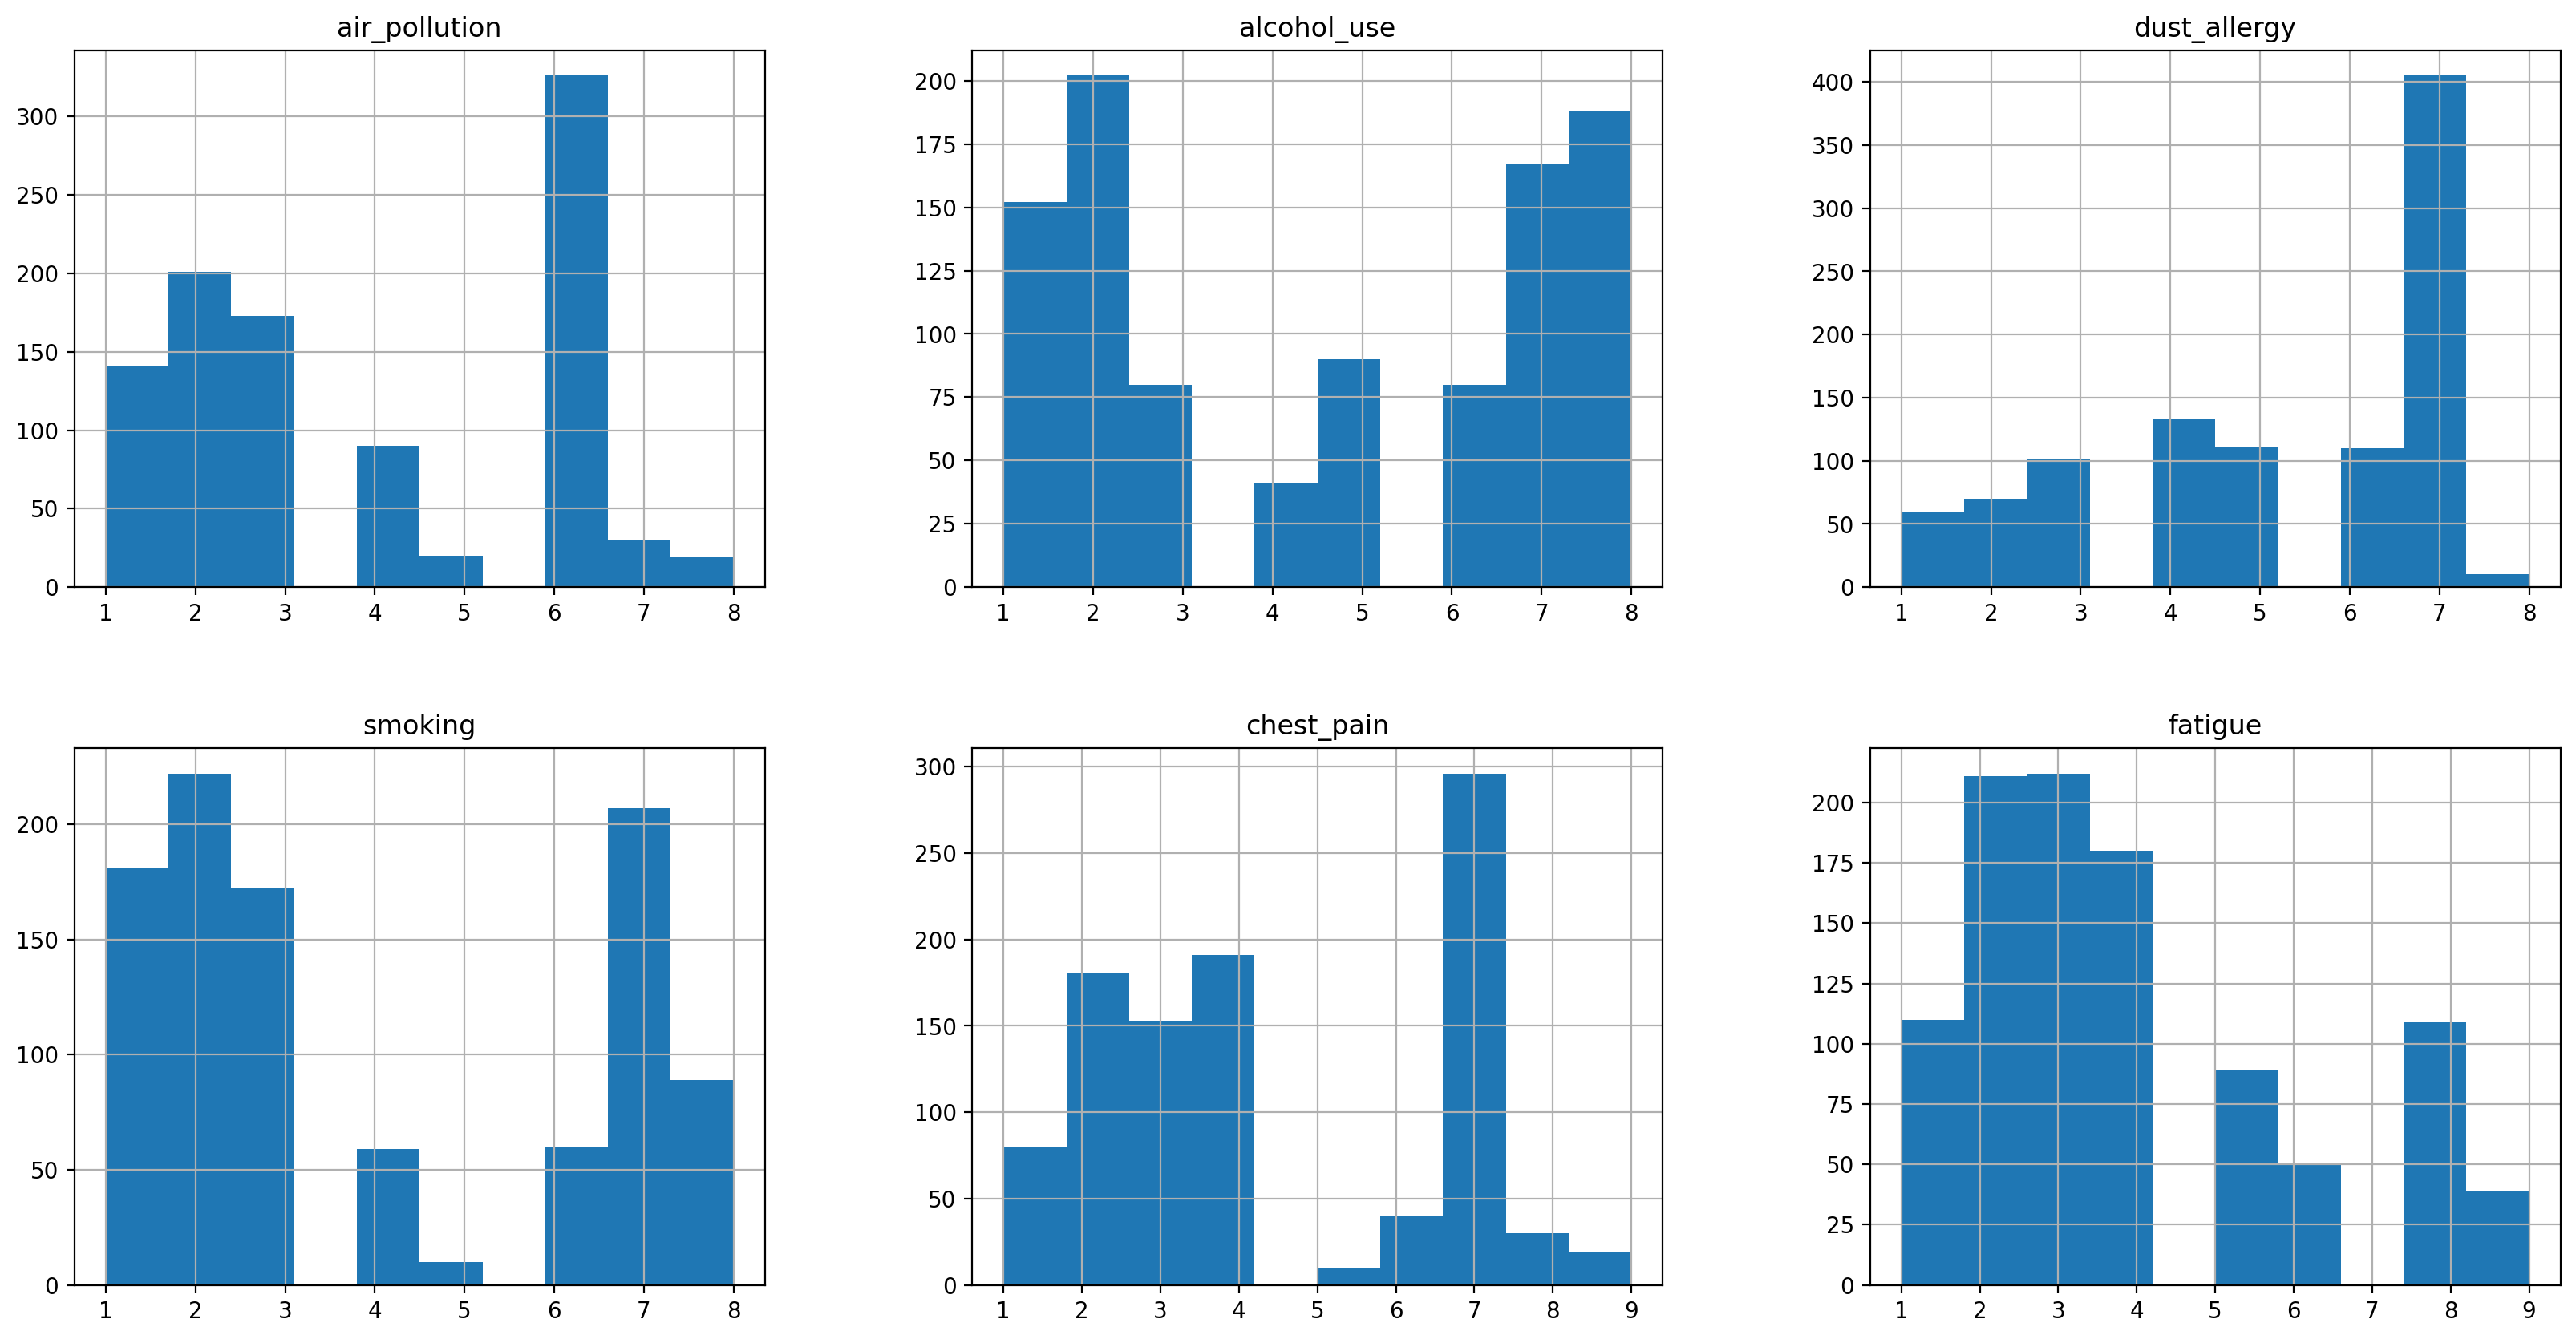

In [ ]:
# Histograms
print('\n')
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in group3:
    df.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()
print('\n')

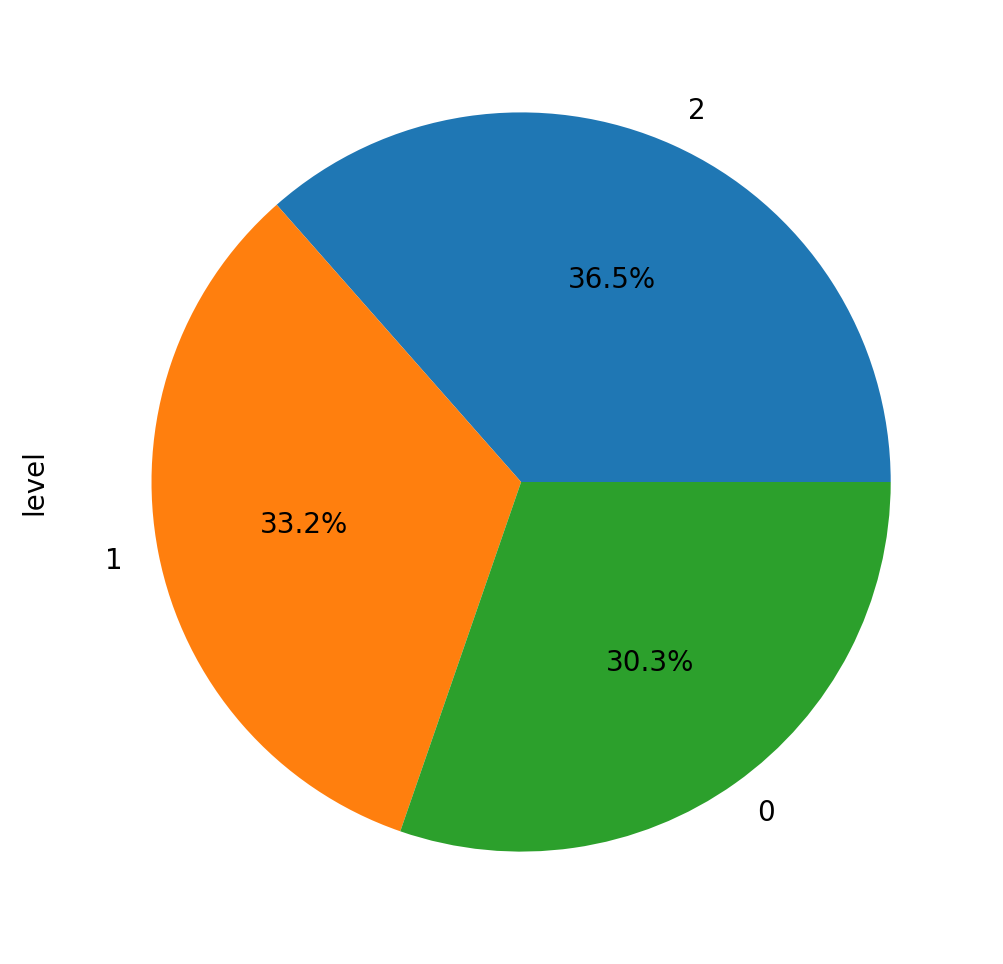

In [ ]:
# Pie Chart

df['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

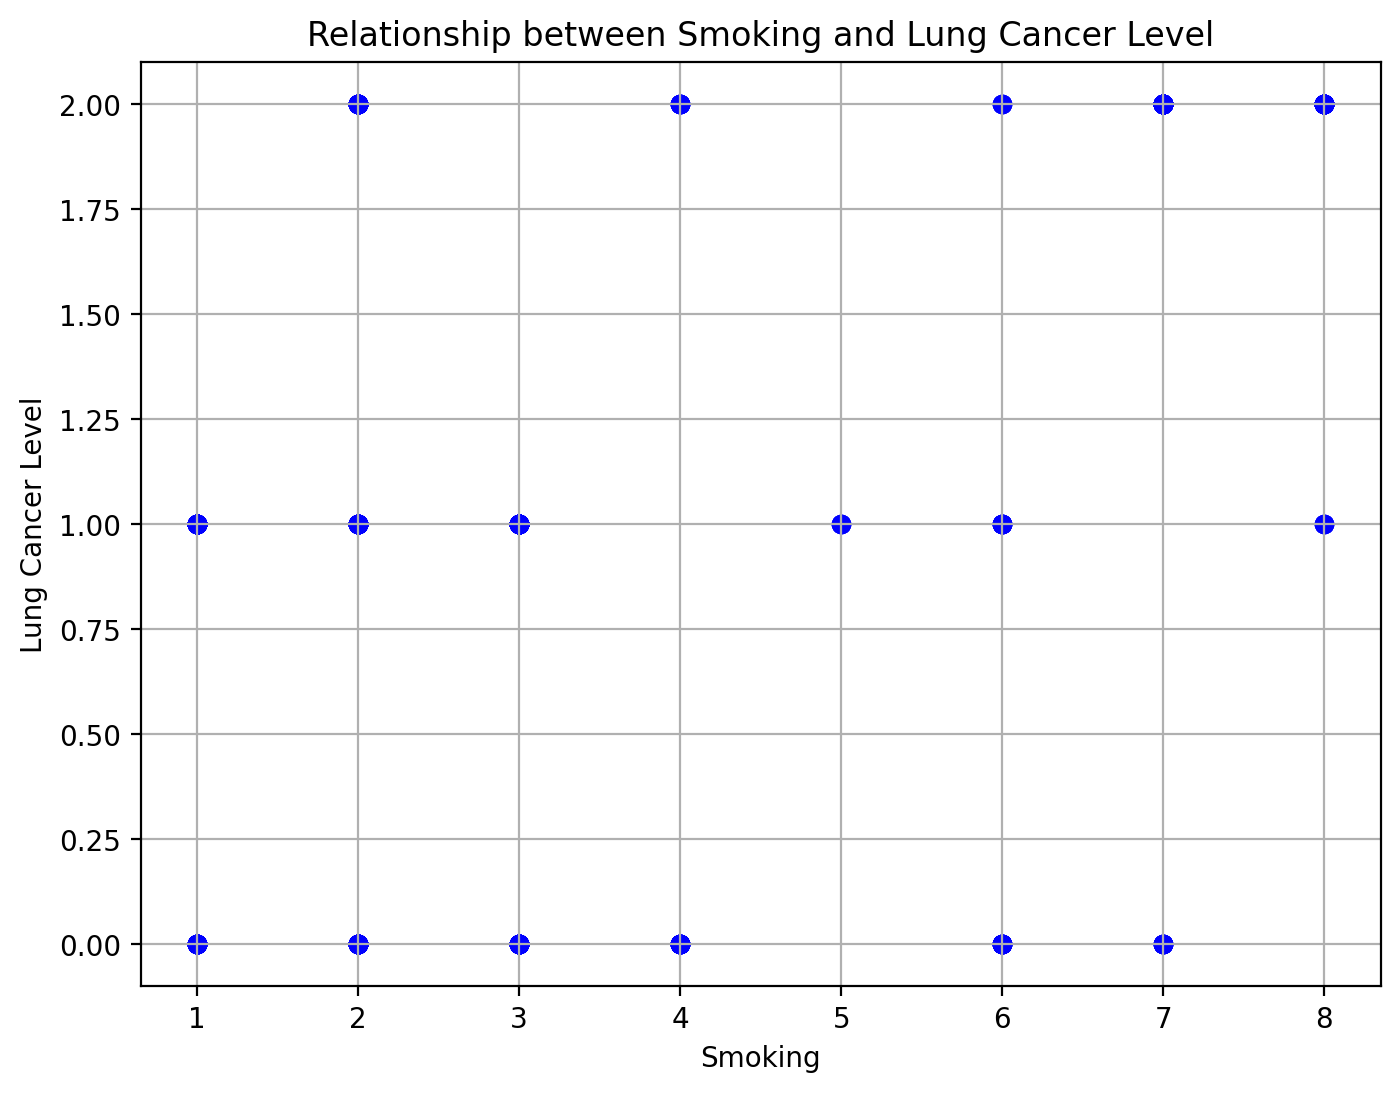

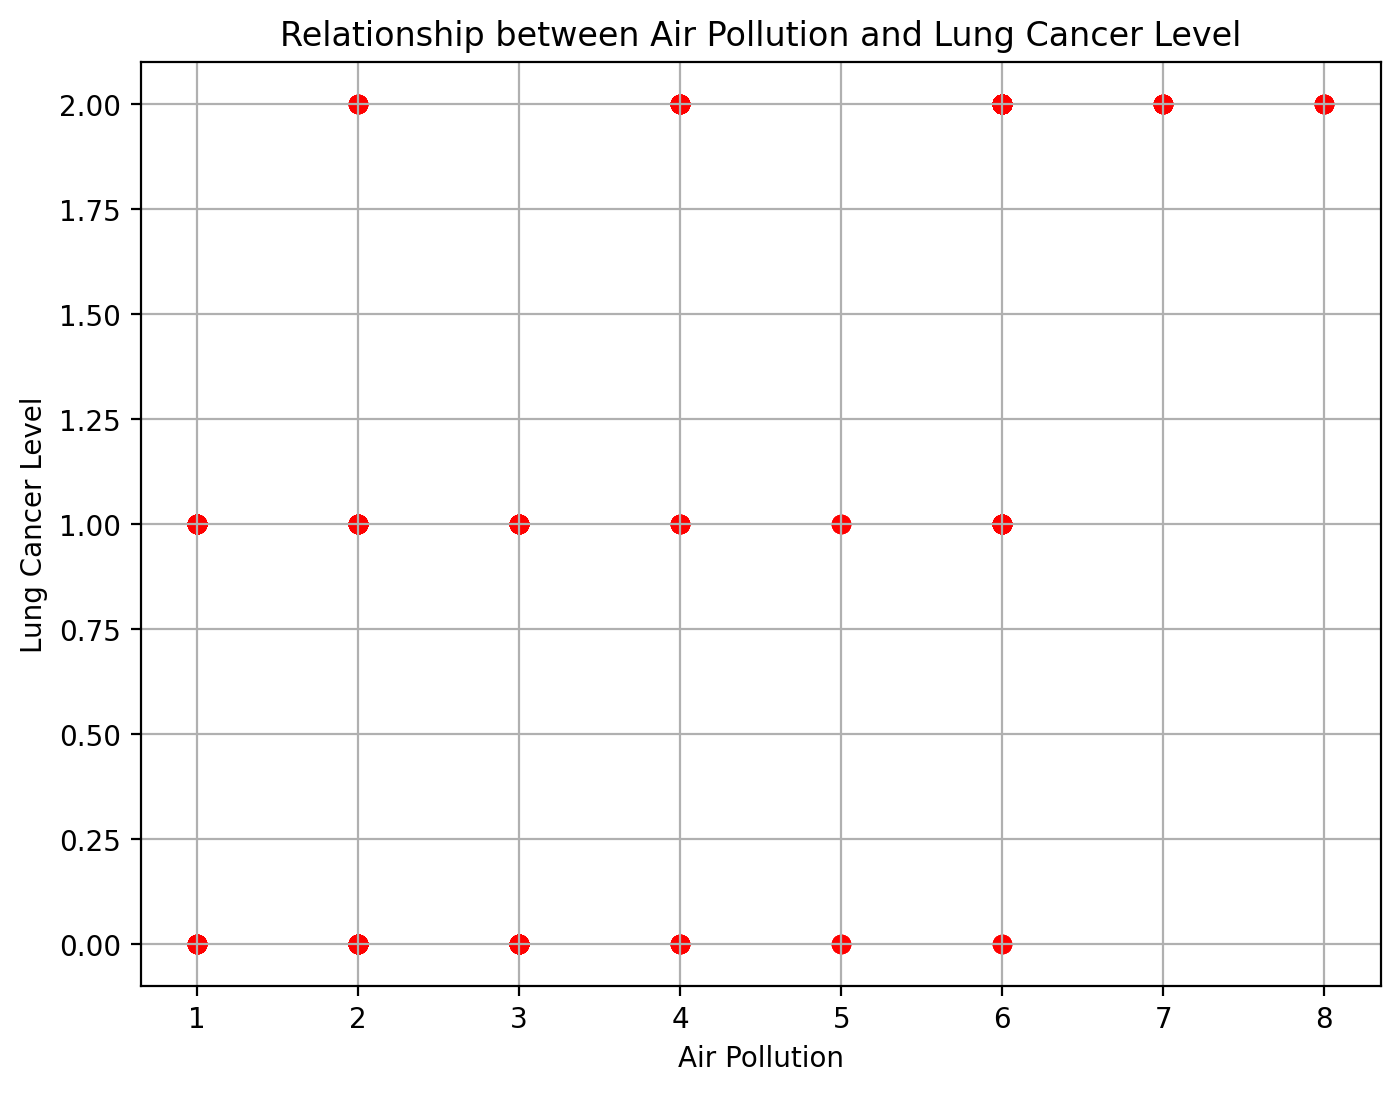

In [ ]:
# Scatter Plot: Smoking and Label of Lung Cancer
plt.figure(figsize=(8, 6))
plt.scatter(df['smoking'], df['level'], alpha=0.5, color='blue')
plt.title('Relationship between Smoking and Lung Cancer Level')
plt.xlabel('Smoking')
plt.ylabel('Lung Cancer Level')
plt.grid(True)

print('\n')

# Scatter Plot: Air Pollution and Label of Lung Cancer
plt.figure(figsize=(8, 6))
plt.scatter(df['air_pollution'], df['level'], alpha=0.5, color='red')
plt.title('Relationship between Air Pollution and Lung Cancer Level')
plt.xlabel('Air Pollution')
plt.ylabel('Lung Cancer Level')
plt.grid(True)
plt.show()

print('\n')

In [ ]:
# Heatmap

print('\n')
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Greens)
plt.show()
print('\n')

In [ ]:
# Setting Label

columns_to_drop = ['level', 'patient_id']
X = df.drop(columns=columns_to_drop)
y = df.level

print('\n')
display(X.head(), y[:10])
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    0
8    1
9    1
Name: level, dtype: int64

In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Train Shape

X train shape:  (800, 23)
Y train shape:  (800,)


Test Shape

X test shape:  (200, 23)
Y test shape:  (200,)




In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions and calculating the accuracy
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)

print(f'The accuracy of KNN is {accuracy_knn}')

The accuracy of KNN is 0.995


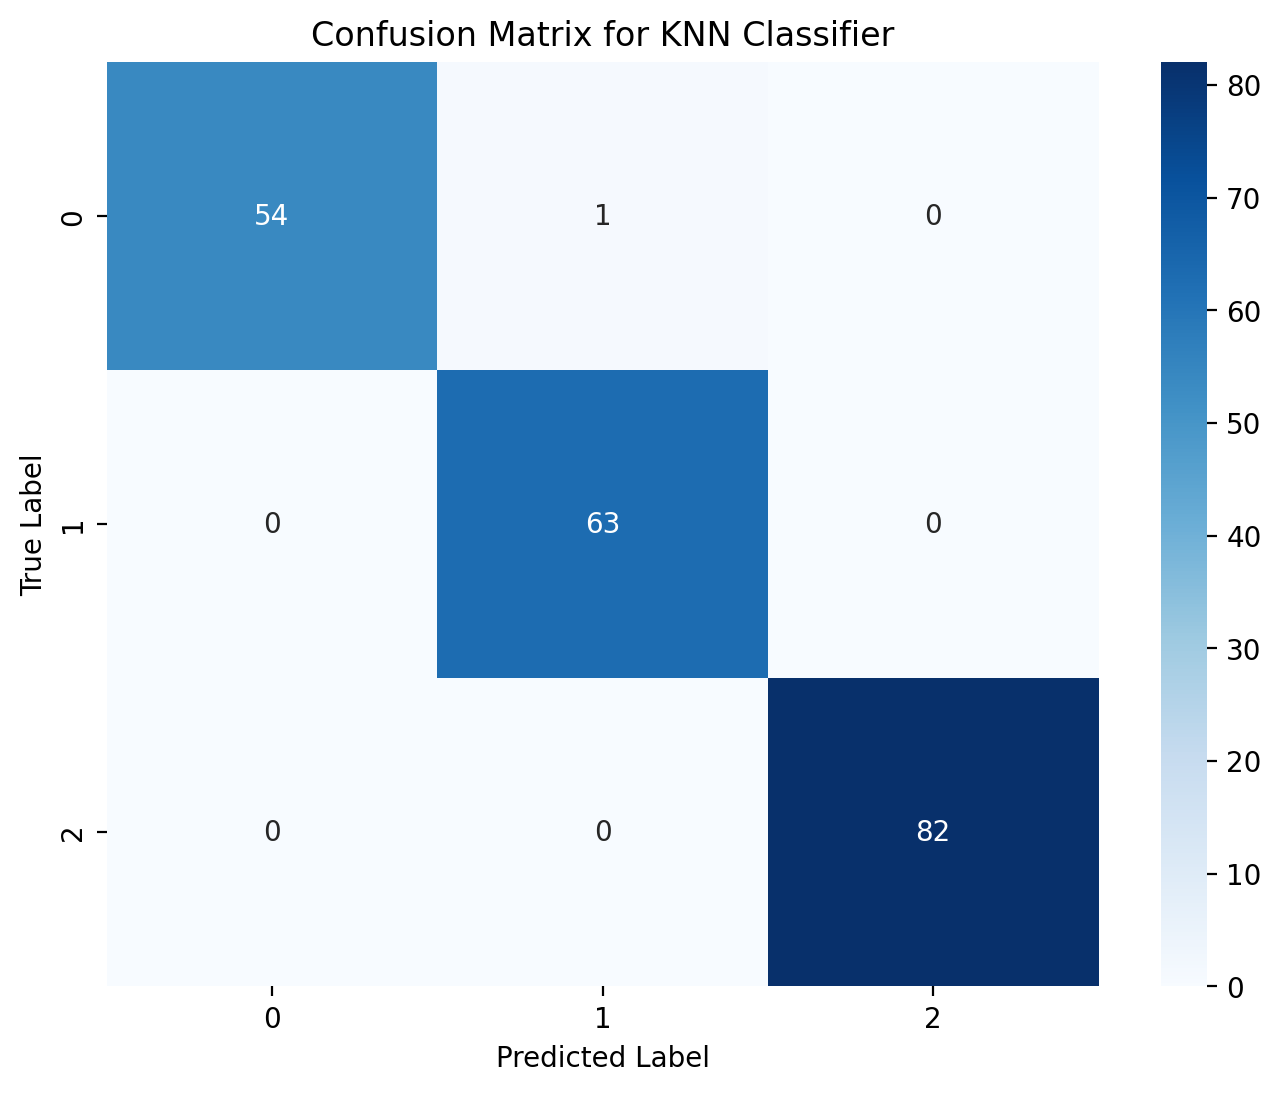

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Classification Report

print('\nClassification Report for KNN\n')
print(classification_report(y_test, y_pred_knn))
print('\n')


Classification Report for Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.98      1.00      0.99        63
           2       1.00      1.00      1.00        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200





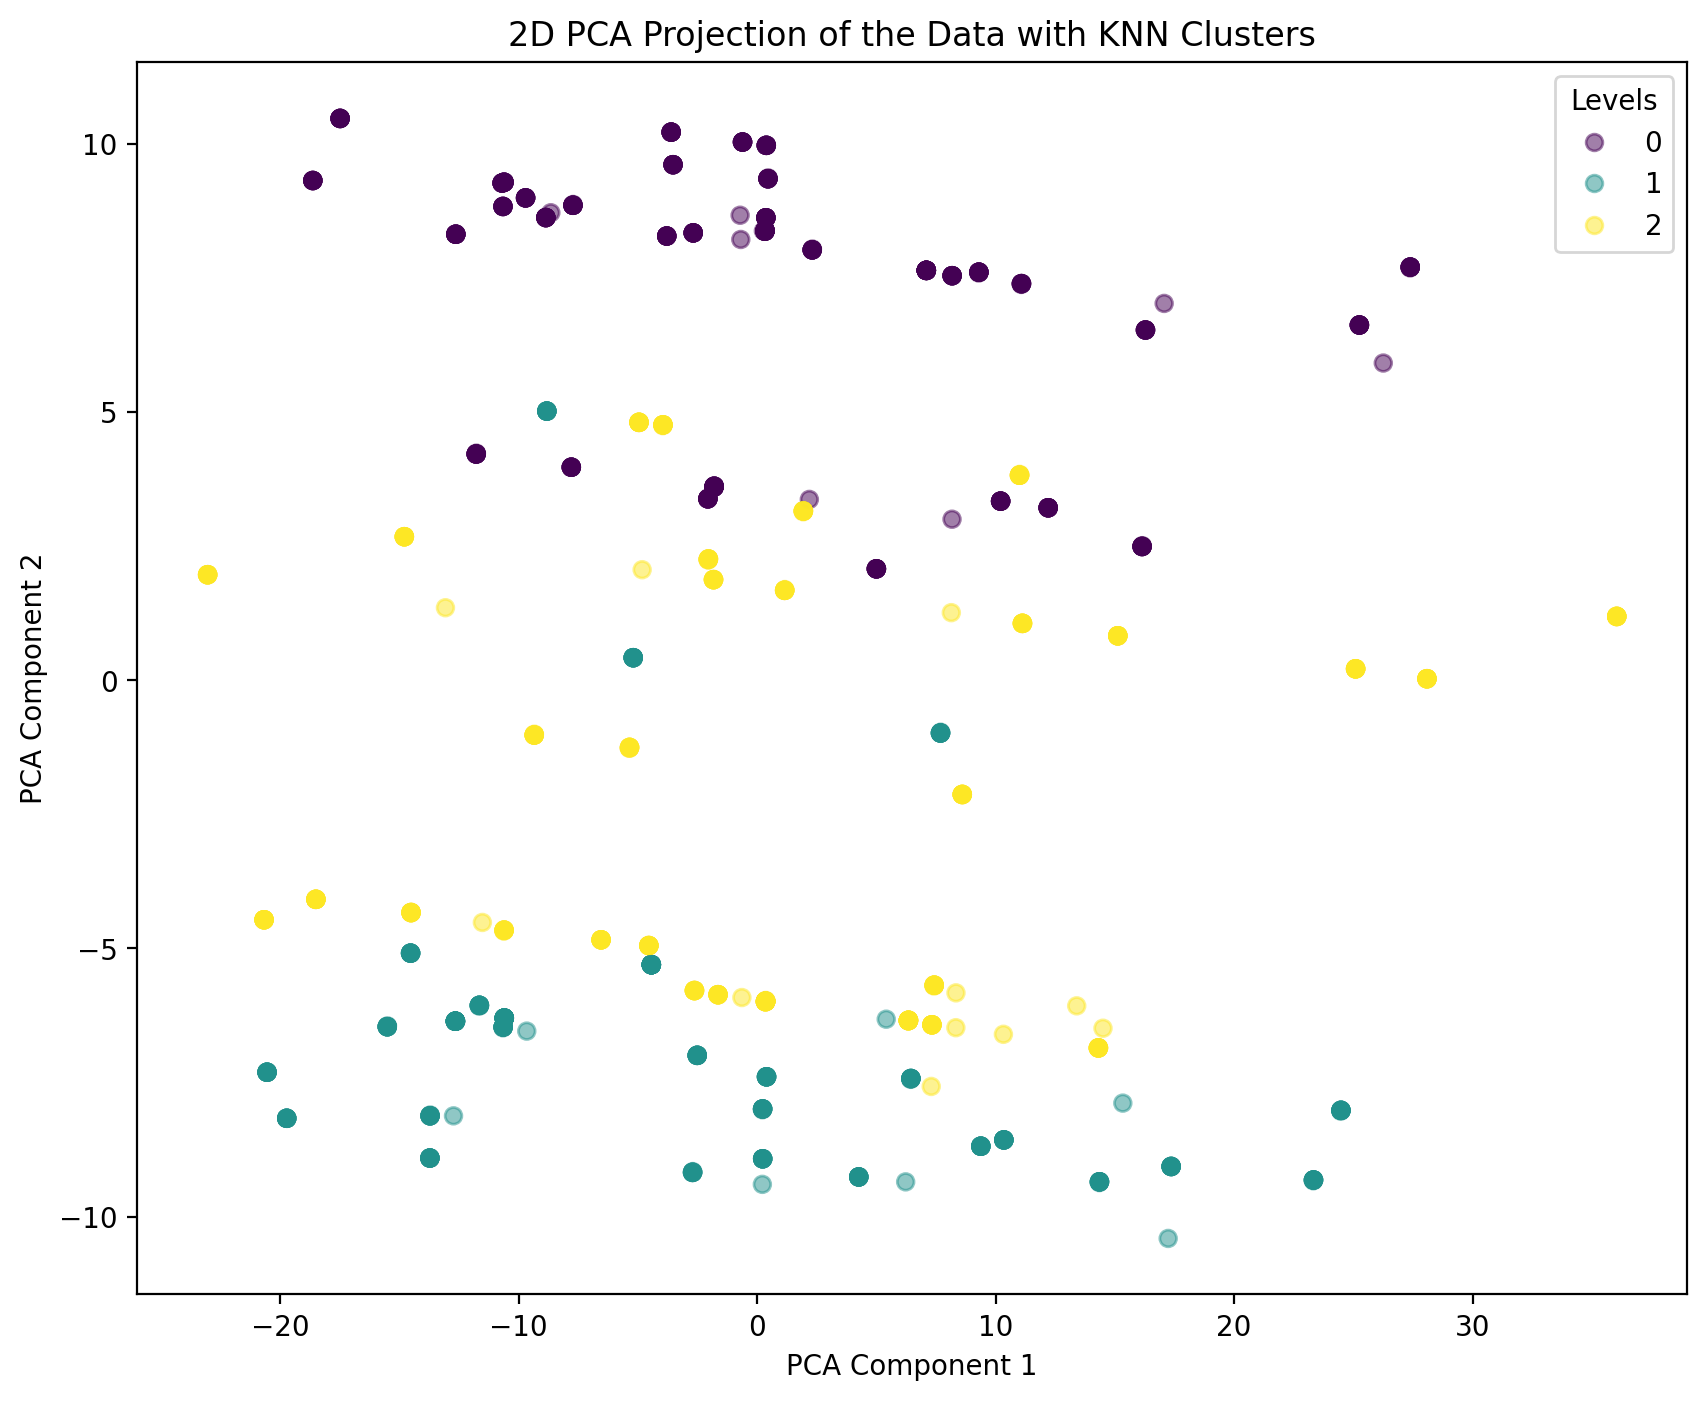

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

clusters = knn.predict(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('2D PCA Projection of the Data with KNN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Levels")
plt.show()

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f'The accuracy of Decision Tree is {accuracy_dtree}')


The accuracy of Decision Tree is 1.0


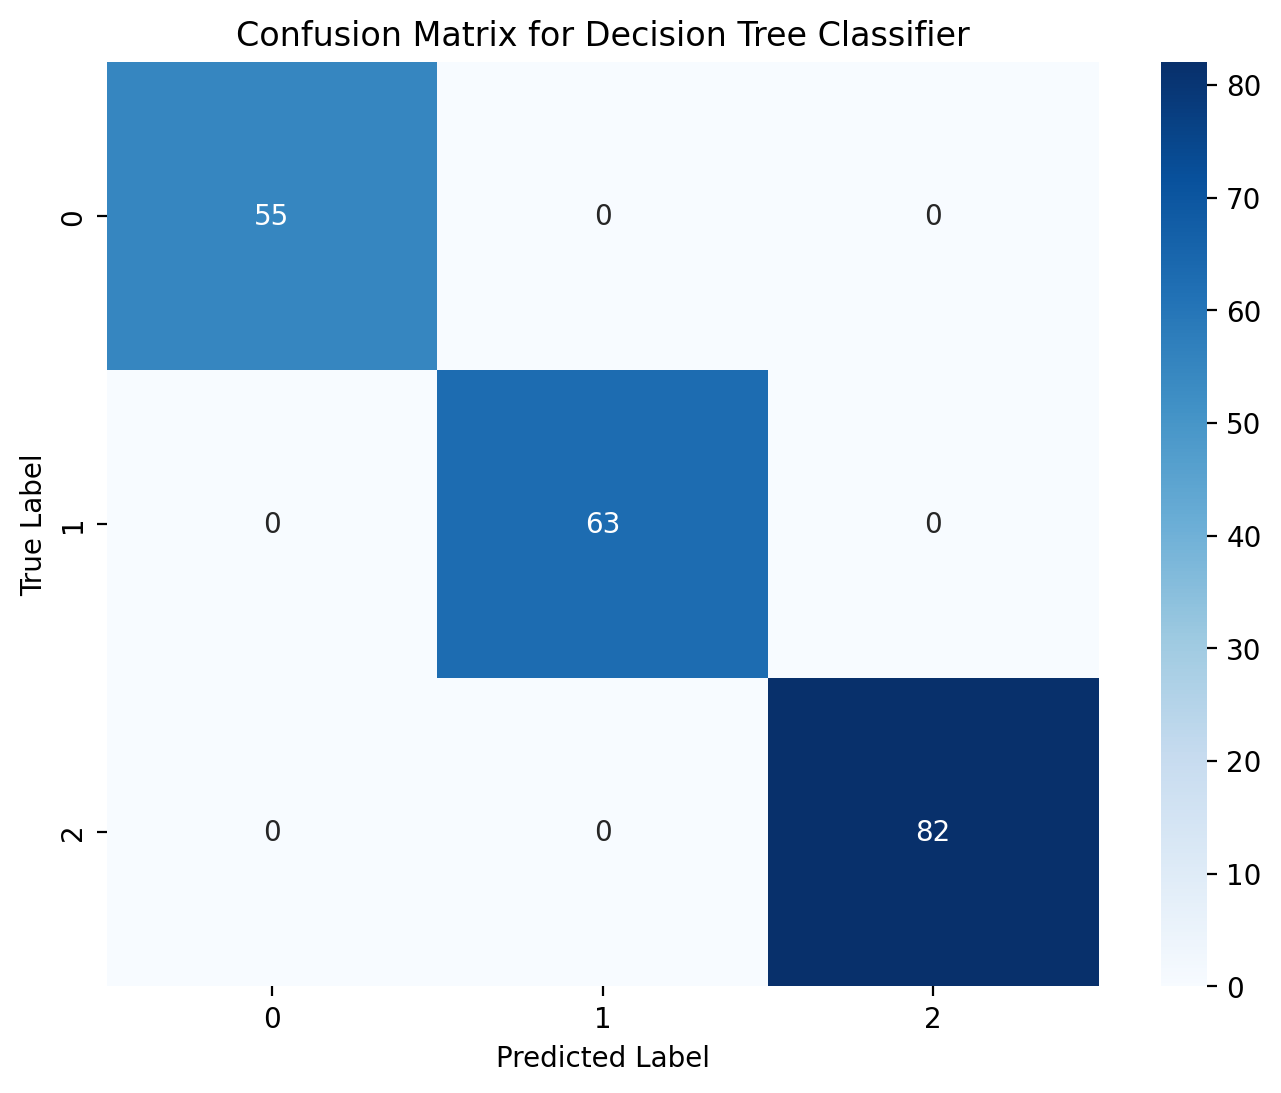

In [ ]:
# Confusion Matrix Decision Tree

cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Classification Report

print('\nClassification Report for Decision Tree\n')
print(classification_report(y_test, y_pred_dtree))
print('\n')


Classification Report for Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200





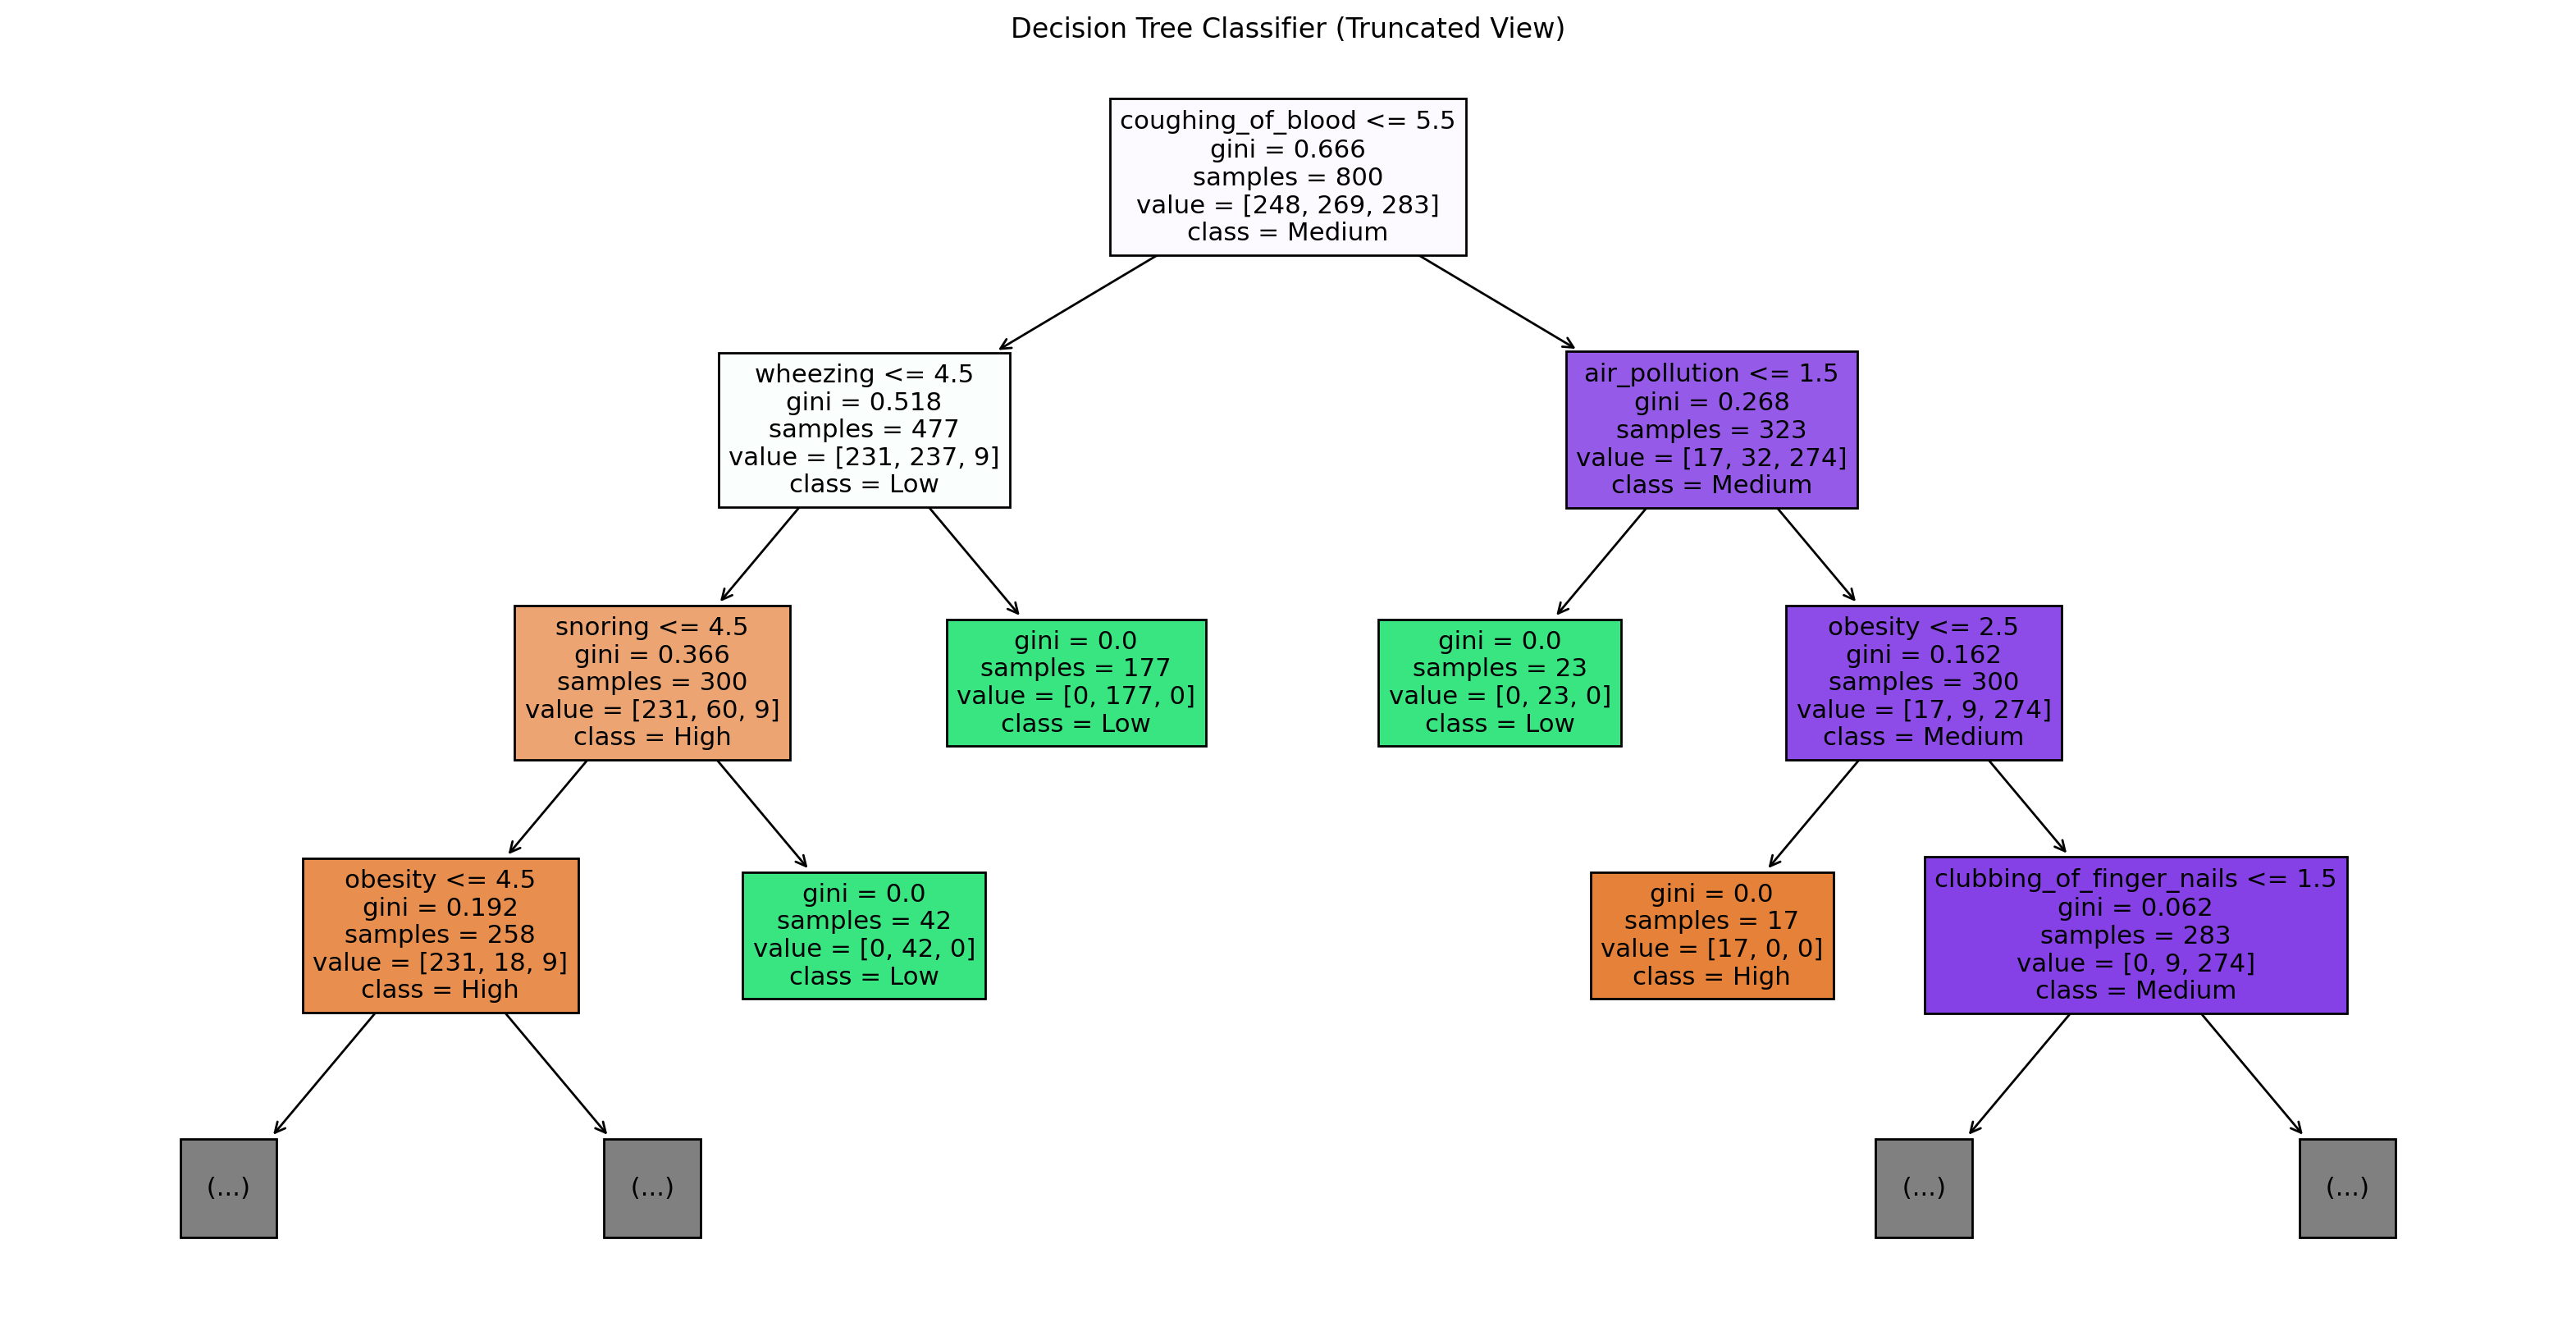

In [ ]:
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, max_depth=3)
plt.title('Decision Tree Classifier (Truncated View)')
plt.show()

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'The accuracy of Logistic Regression is {accuracy_logreg}')

The accuracy of Decision Tree is 1.0


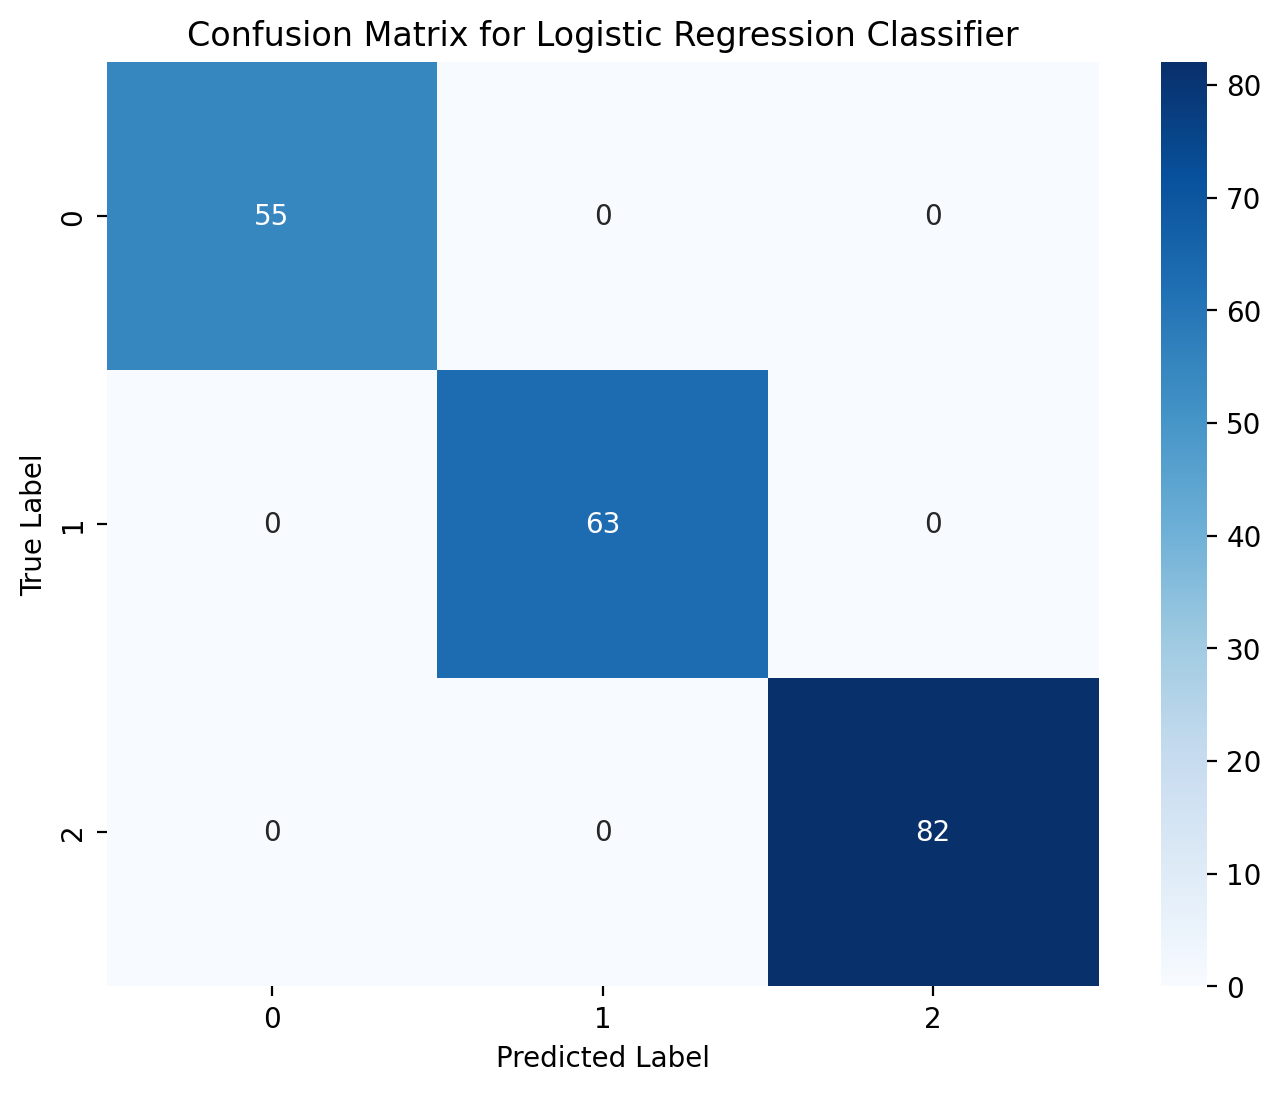

In [ ]:
# Confusion matrix for the Logistic Regression model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Classification Report

print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_pred_logreg))
print('\n')


Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200





In [ ]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'The accuracy of Naive Bayes is {accuracy_nb}')


The accuracy of Naive Bayes is 0.895


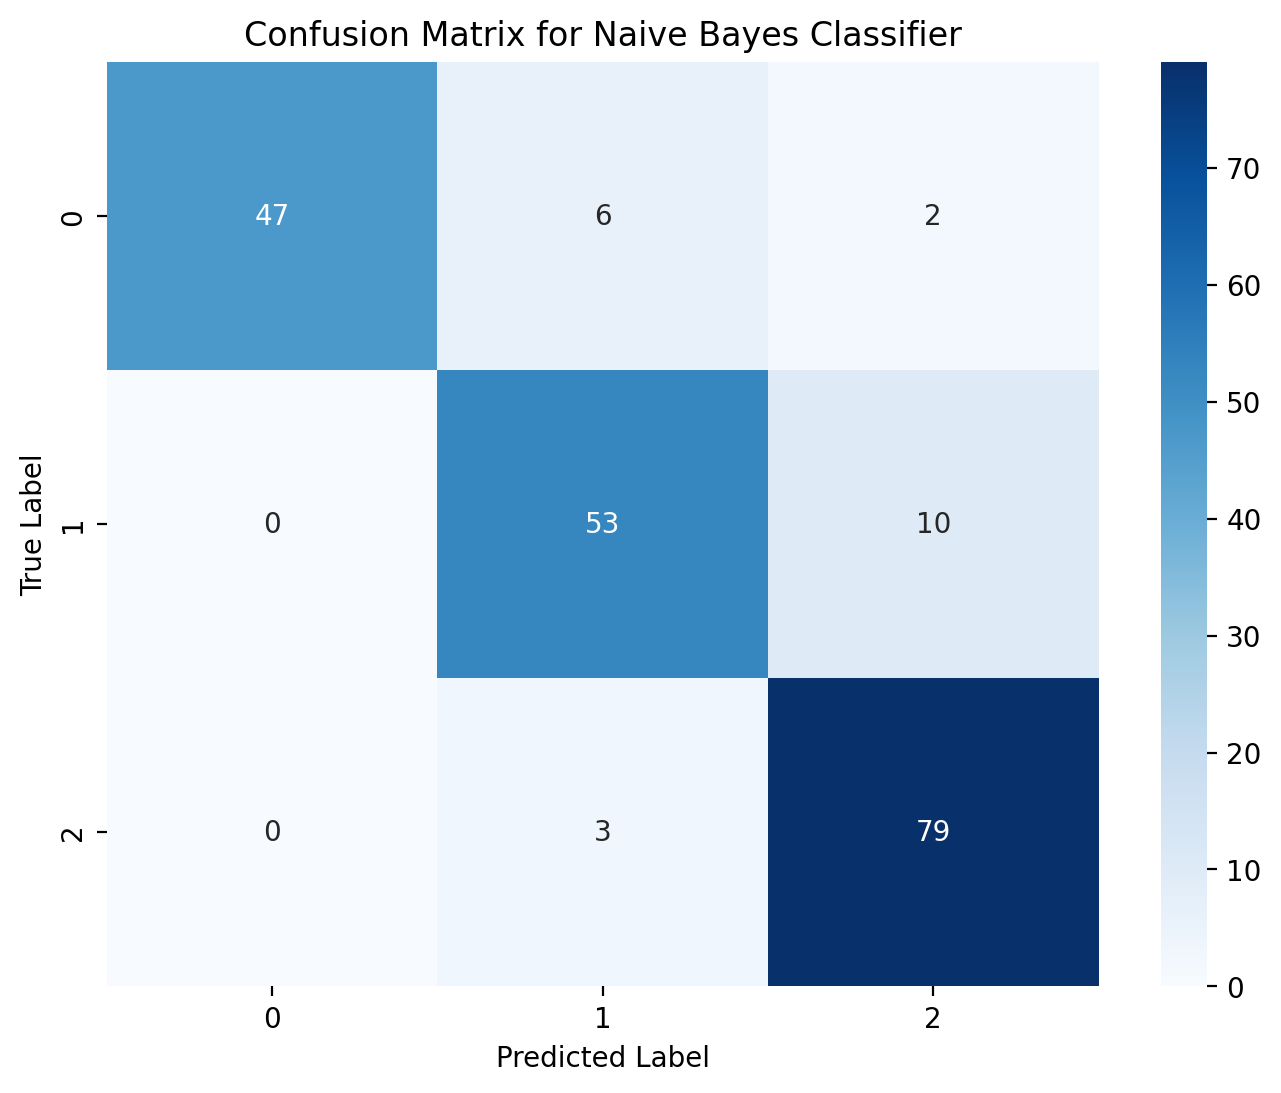

In [ ]:
# Confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Classification Report

print('\nClassification Report for Naive Bayes\n')
print(classification_report(y_test, y_pred_nb))
print('\n')


Classification Report for Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.85      0.84      0.85        63
           2       0.87      0.96      0.91        82

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200





In [ ]:
import pandas as pd

model_scores = {
    "Model": ["K-Nearest Neighbors", "Decision Tree", "Logistic Regression", "Naive Bayes"],
    "Accuracy Score": [accuracy, accuracy_dtree, accuracy_logreg, accuracy_nb]
}

scores_df = pd.DataFrame(model_scores)
scores_df


,Model,Accuracy Score
0,K-Nearest Neighbors,0.995
1,Decision Tree,1.000
2,Logistic Regression,1.000
3,Naive Bayes,0.895


In [ ]:
# Comparison of Models

x=['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes']
y = [accuracy_knn, accuracy_dtree, accuracy_logreg, accuracy_nb]

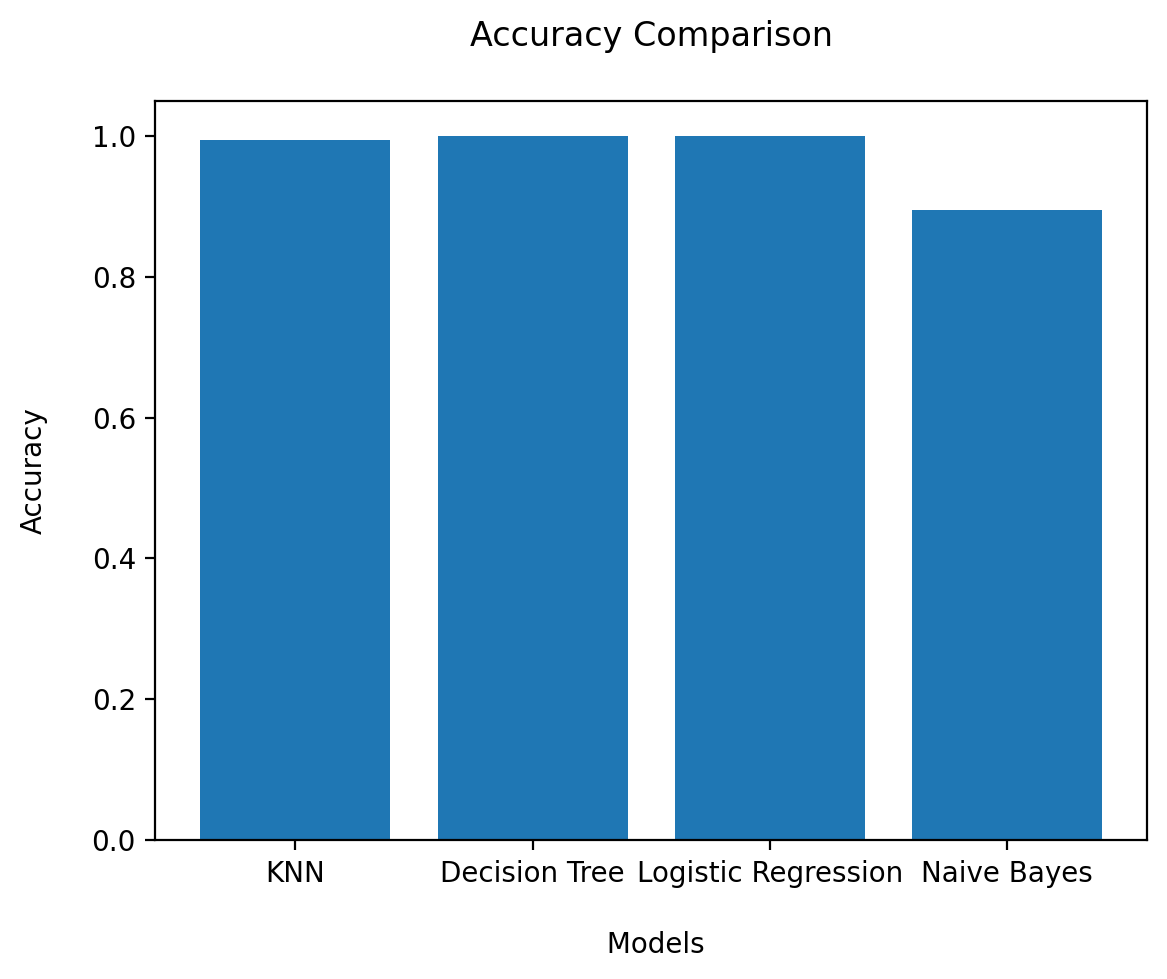

In [ ]:
# Bar Plot

print('\n')
plt.bar(x,y)
plt.xlabel('\n Models')
plt.ylabel("Accuracy\n")
plt.title('Accuracy Comparison\n')
plt.show()
print('\n')

In [ ]:
import pickle

with open('/content/drive/MyDrive/prediction_model.pkl', 'wb') as file:
    pickle.dump(dtree, file)